In [ ]:
# Data from International Coffee Organization (ICO)

In [1]:
# !pip install tabula-py

In [1]:
import tabula
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
# list of daily price PDF files
filelist = [file for file in os.listdir('../data/daily_prices') if 'ipynb' not in file]
filelist

['p1-April2021.pdf',
 'p1-August2020.pdf',
 'p1-December2020.pdf',
 'p1-February2021.pdf',
 'p1-January2021.pdf',
 'p1-July2020.pdf',
 'p1-July2021.pdf',
 'p1-June2021.pdf',
 'p1-March2021.pdf',
 'p1-May2021.pdf',
 'p1-November2020.pdf',
 'p1-October2020.pdf',
 'p1-September2020.pdf']

In [3]:
# read the PDF files, extract the daily price table and save as CSV
for file in filelist:
    try: 
        table = tabula.read_pdf(f'../data/daily_prices/{file}', pages='all', multiple_tables=True)
        table[0].columns = ['date', 'ICO_composite_indicator','colombian_milds','other_milds','brazilian_naturals','robustas']
        df = table[0][3:]
        file = file.replace('.pdf','')
        
        df.to_csv(f'../data/daily_prices_csv/{file}.csv', index=False)

    except:
        print(f'There is a problem with file {file}')
        continue

There is a problem with file p1-January2021.pdf


In [4]:
# The file p1-January2021.pdf doesn't get read by tabula-py
# CSV file was prepared manually

# read data set
table = pd.read_csv('../data/daily_prices_csv_January2021/p1-January2021.csv', sep=' ')

# save again with the same format as the other files
table.to_csv('../data/daily_prices_csv/p1-January2021.csv', index=False)

In [6]:
# creating a useful 'date' column

filelist = [file for file in os.listdir('../data/daily_prices_csv') if 'ipynb' not in file]

for file in filelist:
    # read the CSV file
    df = pd.read_csv(f'../data/daily_prices_csv/{file}')
    # extract month and year from the file name
    month = file.replace('.csv','').replace('p1-','')[:-4]
    year = file.replace('.csv','').replace('p1-','')[-4:]
    # extract day from the 'date' column
    days = [df['date'][row][:2] for row in range(df.shape[0])]
    # new 'date' column containing year-day-month
    df['date'] = [year+'-'+day+'-'+month for day in days]
    # save the new file
    df.to_csv(f'../data/daily_prices_csv_corrected/{file}', index=False)

In [7]:
filelist = [file for file in os.listdir('../data/daily_prices_csv_corrected') if 'ipynb' not in file]

# load first CSV file
df = pd.read_csv(f'../data/daily_prices_csv_corrected/{filelist[0]}')

# take all csv files and concatenate them into 1 data set
for file in filelist[1:]:
    # load next CSV file and concatenate below the previous one(s)
    data = pd.read_csv(f'../data/daily_prices_csv_corrected/{file}')
    df = pd.concat([df, data], axis=0)

# save the data set
df.to_csv('../data/daily_prices.csv', index=False)

In [8]:
df.isnull().sum()

date                       0
ICO_composite_indicator    1
colombian_milds            1
other_milds                0
brazilian_naturals         1
robustas                   1
dtype: int64

In [9]:
df[df.isnull().any(axis=1)] # missing values come from one date, December 25th 2020

,date,ICO_composite_indicator,colombian_milds,other_milds,brazilian_naturals,robustas
18,2020-25-December,NaN,NaN,Holiday,NaN,NaN


In [10]:
# drop the date with missing values
df.dropna(inplace=True)

In [11]:
# same dates contain a mistake - these are average, max and min valuese that were mistakenly read by tabula
# when the table was read from the PDF file
dates_error = [date for date in df['date'] if '-Av-' in date or '-Hi-' in date or '-Lo-' in date]

In [12]:
dates_error

['2020-Av-December',
 '2020-Hi-December',
 '2020-Lo-December',
 '2020-Av-July',
 '2020-Hi-July',
 '2020-Lo-July',
 '2021-Av-March',
 '2021-Hi-March',
 '2021-Lo-March']

In [13]:
# selecting only the rows where 'date' is not one of the mistaken date values
df = df[~df['date'].isin(dates_error)]

In [14]:
df['date'].sort_values()

0      2020-01-December
0          2020-01-July
0       2020-01-October
0     2020-01-September
1      2020-02-December
            ...        
21         2021-30-July
21         2021-30-June
21        2021-30-March
22        2021-31-March
20          2021-31-May
Name: date, Length: 281, dtype: object

In [15]:
# transform the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [16]:
df.dtypes

date                       datetime64[ns]
ICO_composite_indicator           float64
colombian_milds                   float64
other_milds                        object
brazilian_naturals                float64
robustas                          float64
dtype: object

In [22]:
# 'other_milds' is an object - check its values
pd.set_option('display.max_rows', df.shape[0])
df['other_milds']

0     158.26
1      158.1
2     158.69
3     163.22
4     163.32
5     164.15
6     163.66
7     164.45
8     167.21
9     169.05
10    169.82
11    166.58
12    167.09
13    169.61
14    169.41
15    171.13
16    173.33
17    178.02
18    180.46
19    180.44
20    177.79
21    176.48
0     160.27
1     163.07
2     163.65
3     159.49
4     157.85
5     155.33
6     156.67
7     157.48
8     161.54
9     160.18
10    162.39
11    165.84
12    164.24
13    163.95
14    164.75
15    165.19
16    167.82
17    166.91
18    167.14
19     170.9
20     173.6
0     153.41
1     153.96
2     154.89
3     152.69
4     153.80
5     153.83
6     151.87
7     155.66
8     156.15
9     160.77
10    159.40
11    161.21
12    161.36
13    160.11
14    159.41
15    159.39
16    159.64
17    161.02
19    158.57
20    160.55
21    160.69
22    163.34
0     164.38
1     162.64
2     163.08
3     163.31
4     163.67
5     163.04
6     162.19
7     160.34
8      160.3
9     160.44
10    160.66
11    163.46

In [23]:
# transforming to a float type
df['other_milds'] = df['other_milds'].astype(float)

In [24]:
# setting the date as the index
df.set_index('date', inplace=True)

---

In [25]:
# calculating the mean price for Arabica coffees
df['arabicas'] = round(((df['colombian_milds'] + df['other_milds'] + df['brazilian_naturals']) / 3), 2)

In [26]:
# check the summary stats for the data
df.describe()

,ICO_composite_indicator,colombian_milds,other_milds,brazilian_naturals,robustas,arabicas
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.000000
mean,120.801459,177.555730,167.934413,121.364698,75.186868,155.618327
std,14.563106,20.575926,18.014121,19.409141,7.431356,19.260113
min,98.590000,146.780000,140.480000,91.250000,63.700000,126.220000
25%,111.340000,164.490000,156.150000,109.170000,71.080000,142.270000
50%,116.920000,173.790000,163.320000,117.390000,72.770000,151.060000
75%,127.210000,187.530000,177.290000,129.960000,77.150000,164.800000
max,178.900000,258.880000,242.950000,201.150000,103.220000,234.330000


In [27]:
# save data set
df.to_csv('../data/daily_prices2.csv')

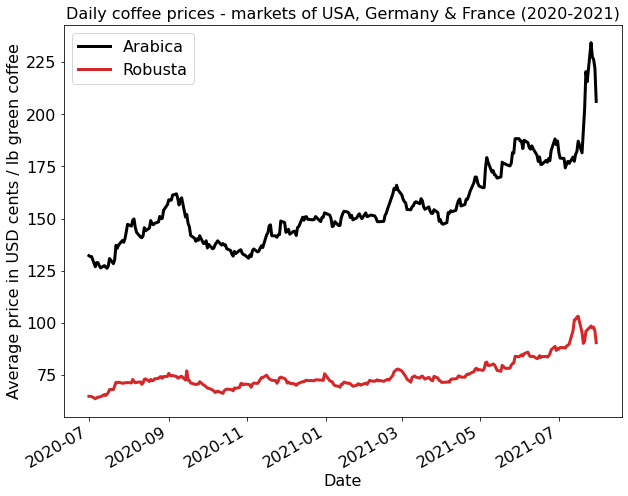

In [28]:
df['arabicas'].plot(figsize=(10,8), color='black', label='Arabica', linewidth=3);
df['robustas'].plot(figsize=(10,8), color='tab:red', label='Robusta', linewidth=3);
plt.legend(prop={'size':16});
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.title('Daily coffee prices - markets of USA, Germany & France (2020-2021)', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('../images/plots/daily_prices_arabicas_robustas.jpeg');

In [29]:
df['avg'] = round(((df['arabicas'] + df['robustas'])/2),2)

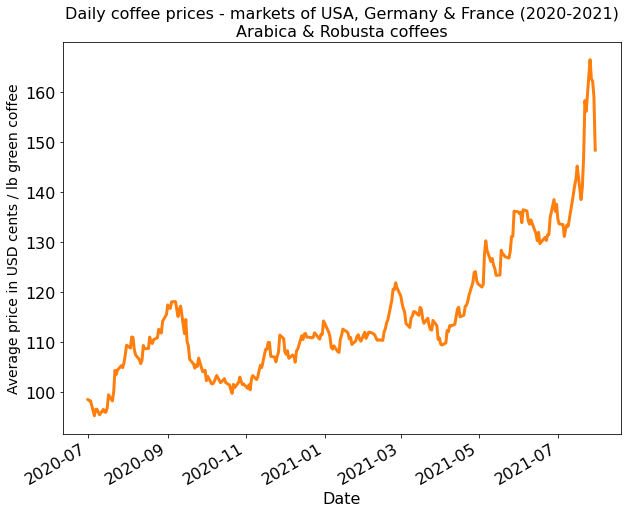

In [30]:
df['avg'].plot(figsize=(10,8), color='tab:orange', linewidth=3);
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.title('Daily coffee prices - markets of USA, Germany & France (2020-2021)\nArabica & Robusta coffees', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('../images/plots/daily_prices_avg.jpeg');

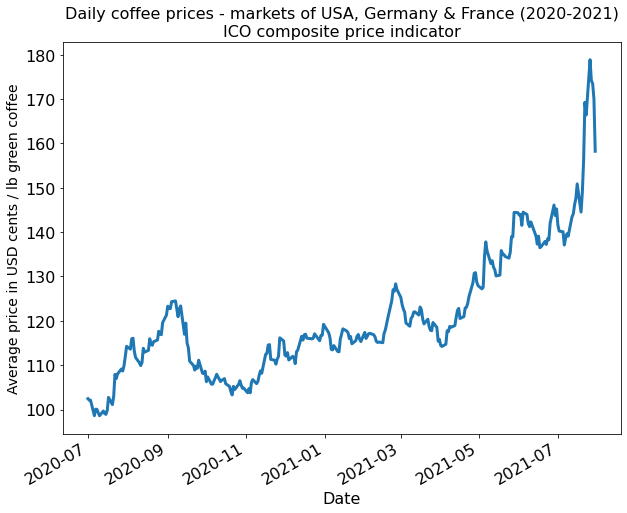

In [31]:
df['ICO_composite_indicator'].plot(figsize=(10,8), color='tab:blue', linewidth=3);
plt.ylabel('Average price in USD cents / lb green coffee', fontsize=14)
plt.xlabel('Date', fontsize=16)
plt.title('Daily coffee prices - markets of USA, Germany & France (2020-2021)\nICO composite price indicator', fontsize=16);
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.savefig('../images/plots/daily_prices_ico_composite.jpeg');

---